Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



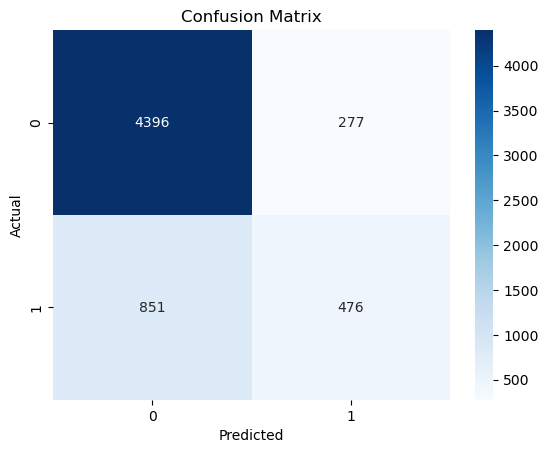

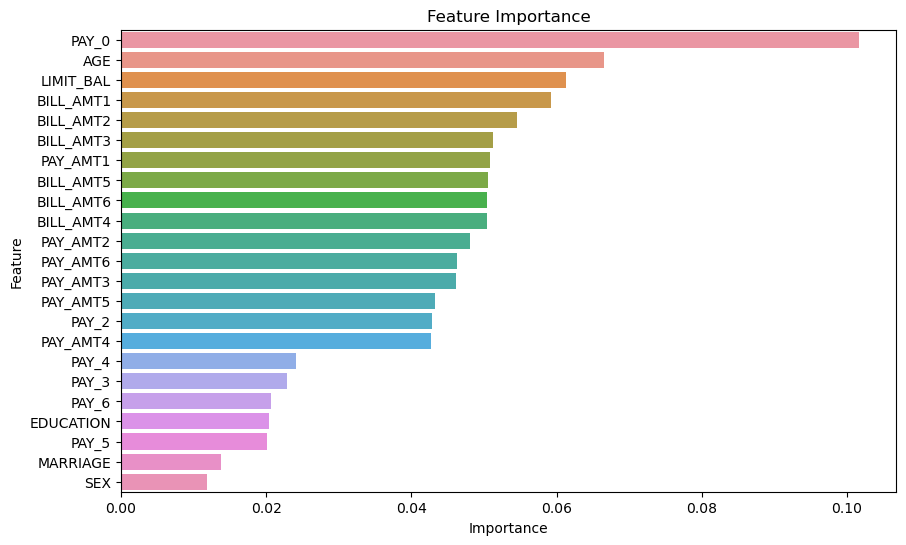

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('crcl.csv')  # Replace with your actual CSV file

# Drop 'ID' as it's not a useful feature
df = df.drop(columns=['ID'])

# Define features and target
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = df.drop(columns=['default payment next month']).columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()


Round 1: Accuracy = 0.7844
Round 2: Accuracy = 0.7858
Round 3: Accuracy = 0.7861
Round 4: Accuracy = 0.7867
Round 5: Accuracy = 0.7869
Round 6: Accuracy = 0.7873
Round 7: Accuracy = 0.7889
Round 8: Accuracy = 0.7901
Round 9: Accuracy = 0.7913
Round 10: Accuracy = 0.7918
Round 11: Accuracy = 0.7931
Round 12: Accuracy = 0.7937
Round 13: Accuracy = 0.7948
Round 14: Accuracy = 0.7954
Round 15: Accuracy = 0.7953
Round 16: Accuracy = 0.7967
Round 17: Accuracy = 0.7971
Round 18: Accuracy = 0.7973
Round 19: Accuracy = 0.7978
Round 20: Accuracy = 0.7977


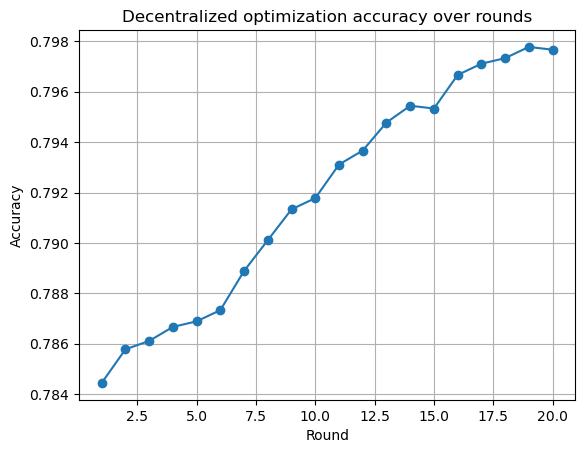

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("crcl.csv")
df = df.drop(columns=["ID"])
X = df.drop(columns=["default payment next month"]).values
y = df["default payment next month"].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Shuffle and split dataset
X, y = shuffle(X, y, random_state=42)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simulate clients
num_clients = 5
data = list(zip(X_train_full, y_train_full))
client_data = [data[i::num_clients] for i in range(num_clients)]

# Initialize local weights for clients
n_features = X.shape[1]
client_weights = [np.zeros(n_features) for _ in range(num_clients)]
client_biases = [0.0 for _ in range(num_clients)]

# Simulate a ring topology for communication
def get_neighbors(i):
    return [(i - 1) % num_clients, (i + 1) % num_clients]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training function (one gradient step)
def gradient_step(X, y, weights, bias, lr):
    m = len(y)
    z = np.dot(X, weights) + bias
    preds = sigmoid(z)
    error = preds - y
    grad_w = np.dot(X.T, error) / m
    grad_b = np.mean(error)
    return weights - lr * grad_w, bias - lr * grad_b

# Decentralized Gradient Descent
rounds = 20
lr = 0.1
accuracy_history = []

for r in range(rounds):
    new_weights = []
    new_biases = []

    for i in range(num_clients):
        # Local data
        X_local, y_local = zip(*client_data[i])
        X_local, y_local = np.array(X_local), np.array(y_local)

        # Gradient descent step
        w, b = gradient_step(X_local, y_local, client_weights[i], client_biases[i], lr)

        # Average with neighbors
        neighbors = get_neighbors(i)
        neighbor_weights = [client_weights[j] for j in neighbors]
        neighbor_biases = [client_biases[j] for j in neighbors]

        avg_w = (w + sum(neighbor_weights)) / (len(neighbor_weights) + 1)
        avg_b = (b + sum(neighbor_biases)) / (len(neighbor_biases) + 1)

        new_weights.append(avg_w)
        new_biases.append(avg_b)

    client_weights = new_weights
    client_biases = new_biases

    # Evaluate average model
    avg_model_w = np.mean(client_weights, axis=0)
    avg_model_b = np.mean(client_biases)
    preds = sigmoid(np.dot(X_test, avg_model_w) + avg_model_b) >= 0.5
    acc = accuracy_score(y_test, preds)
    accuracy_history.append(acc)
    print(f"Round {r+1}: Accuracy = {acc:.4f}")

# Plot accuracy over rounds
plt.plot(range(1, rounds + 1), accuracy_history, marker='o')
plt.title("Decentralized optimization accuracy over rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Round 1: Accuracy = 0.7844
Round 2: Accuracy = 0.7858
Round 3: Accuracy = 0.7861
Round 4: Accuracy = 0.7867
Round 5: Accuracy = 0.7869
Round 6: Accuracy = 0.7873
Round 7: Accuracy = 0.7889
Round 8: Accuracy = 0.7901
Round 9: Accuracy = 0.7913
Round 10: Accuracy = 0.7918
Round 11: Accuracy = 0.7931
Round 12: Accuracy = 0.7937
Round 13: Accuracy = 0.7948
Round 14: Accuracy = 0.7954
Round 15: Accuracy = 0.7953
Round 16: Accuracy = 0.7967
Round 17: Accuracy = 0.7971
Round 18: Accuracy = 0.7973
Round 19: Accuracy = 0.7978
Round 20: Accuracy = 0.7977


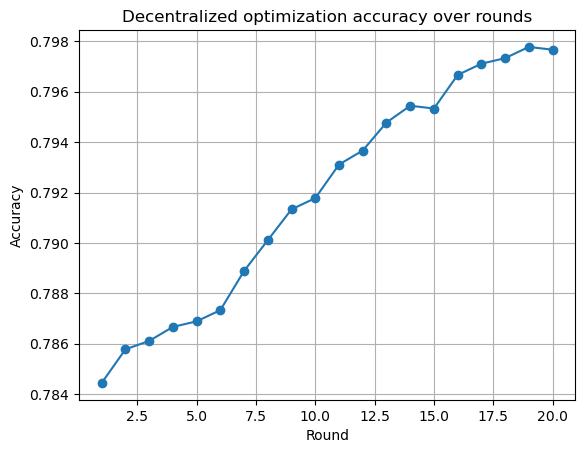

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("crcl.csv")
df = df.drop(columns=["ID"])
X = df.drop(columns=["default payment next month"]).values
y = df["default payment next month"].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Shuffle and split dataset
X, y = shuffle(X, y, random_state=42)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simulate clients
num_clients = 5
data = list(zip(X_train_full, y_train_full))
client_data = [data[i::num_clients] for i in range(num_clients)]

# Initialize local weights for clients
n_features = X.shape[1]
client_weights = [np.zeros(n_features) for _ in range(num_clients)]
client_biases = [0.0 for _ in range(num_clients)]

# Simulate a ring topology for communication
def get_neighbors(i):
    return [(i - 1) % num_clients, (i + 1) % num_clients]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training function (one gradient step)
def gradient_step(X, y, weights, bias, lr):
    m = len(y)
    z = np.dot(X, weights) + bias
    preds = sigmoid(z)
    error = preds - y
    grad_w = np.dot(X.T, error) / m
    grad_b = np.mean(error)
    return weights - lr * grad_w, bias - lr * grad_b

# Decentralized Gradient Descent
rounds = 20
lr = 0.1
accuracy_history = []

for r in range(rounds):
    new_weights = []
    new_biases = []

    for i in range(num_clients):
        # Local data
        X_local, y_local = zip(*client_data[i])
        X_local, y_local = np.array(X_local), np.array(y_local)

        # Gradient descent step
        w, b = gradient_step(X_local, y_local, client_weights[i], client_biases[i], lr)

        # Average with neighbors
        neighbors = get_neighbors(i)
        neighbor_weights = [client_weights[j] for j in neighbors]
        neighbor_biases = [client_biases[j] for j in neighbors]

        avg_w = (w + sum(neighbor_weights)) / (len(neighbor_weights) + 1)
        avg_b = (b + sum(neighbor_biases)) / (len(neighbor_biases) + 1)

        new_weights.append(avg_w)
        new_biases.append(avg_b)

    client_weights = new_weights
    client_biases = new_biases

    # Evaluate average model
    avg_model_w = np.mean(client_weights, axis=0)
    avg_model_b = np.mean(client_biases)
    preds = sigmoid(np.dot(X_test, avg_model_w) + avg_model_b) >= 0.5
    acc = accuracy_score(y_test, preds)
    accuracy_history.append(acc)
    print(f"Round {r+1}: Accuracy = {acc:.4f}")

# Plot accuracy over rounds
plt.plot(range(1, rounds + 1), accuracy_history, marker='o')
plt.title("Decentralized optimization accuracy over rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Round 1: Accuracy = 0.7844
Round 2: Accuracy = 0.7858
Round 3: Accuracy = 0.7861
Round 4: Accuracy = 0.7867
Round 5: Accuracy = 0.7869
Round 6: Accuracy = 0.7873
Round 7: Accuracy = 0.7889
Round 8: Accuracy = 0.7901
Round 9: Accuracy = 0.7913
Round 10: Accuracy = 0.7918
Round 11: Accuracy = 0.7931
Round 12: Accuracy = 0.7937
Round 13: Accuracy = 0.7948
Round 14: Accuracy = 0.7954
Round 15: Accuracy = 0.7953
Round 16: Accuracy = 0.7967
Round 17: Accuracy = 0.7971
Round 18: Accuracy = 0.7973
Round 19: Accuracy = 0.7978
Round 20: Accuracy = 0.7977


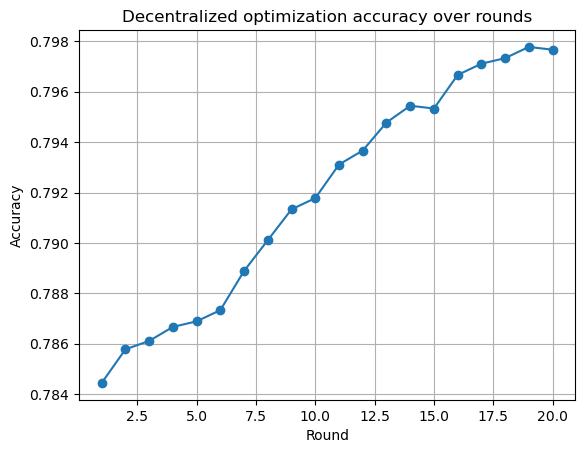

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("crcl.csv")
df = df.drop(columns=["ID"])
X = df.drop(columns=["default payment next month"]).values
y = df["default payment next month"].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Shuffle and split dataset
X, y = shuffle(X, y, random_state=42)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simulate clients
num_clients = 5
data = list(zip(X_train_full, y_train_full))
client_data = [data[i::num_clients] for i in range(num_clients)]

# Initialize local weights for clients
n_features = X.shape[1]
client_weights = [np.zeros(n_features) for _ in range(num_clients)]
client_biases = [0.0 for _ in range(num_clients)]

# Simulate a ring topology for communication
def get_neighbors(i):
    return [(i - 1) % num_clients, (i + 1) % num_clients]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training function (one gradient step)
def gradient_step(X, y, weights, bias, lr):
    m = len(y)
    z = np.dot(X, weights) + bias
    preds = sigmoid(z)
    error = preds - y
    grad_w = np.dot(X.T, error) / m
    grad_b = np.mean(error)
    return weights - lr * grad_w, bias - lr * grad_b

# Decentralized Gradient Descent
rounds = 20
lr = 0.1
accuracy_history = []

for r in range(rounds):
    new_weights = []
    new_biases = []

    for i in range(num_clients):
        # Local data
        X_local, y_local = zip(*client_data[i])
        X_local, y_local = np.array(X_local), np.array(y_local)

        # Gradient descent step
        w, b = gradient_step(X_local, y_local, client_weights[i], client_biases[i], lr)

        # Average with neighbors
        neighbors = get_neighbors(i)
        neighbor_weights = [client_weights[j] for j in neighbors]
        neighbor_biases = [client_biases[j] for j in neighbors]

        avg_w = (w + sum(neighbor_weights)) / (len(neighbor_weights) + 1)
        avg_b = (b + sum(neighbor_biases)) / (len(neighbor_biases) + 1)

        new_weights.append(avg_w)
        new_biases.append(avg_b)

    client_weights = new_weights
    client_biases = new_biases

    # Evaluate average model
    avg_model_w = np.mean(client_weights, axis=0)
    avg_model_b = np.mean(client_biases)
    preds = sigmoid(np.dot(X_test, avg_model_w) + avg_model_b) >= 0.5
    acc = accuracy_score(y_test, preds)
    accuracy_history.append(acc)
    print(f"Round {r+1}: Accuracy = {acc:.4f}")

# Plot accuracy over rounds
plt.plot(range(1, rounds + 1), accuracy_history, marker='o')
plt.title("Decentralized optimization accuracy over rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
